# Facial Expression Recognition with Pytorch

## Dataset Link
https://www.kaggle.com/jonathanoheix/face-expression-recognition-dataset

### Install Libraries, Packages and dataset

In [4]:
!git clone https://github.com/parth1620/Facial-Expression-Dataset.git

python(20473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


fatal: destination path 'Facial-Expression-Dataset' already exists and is not an empty directory.


In [5]:
!pip install -U git+https://github.com/albumentations-team/albumentations

python(20476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Cloning https://github.com/albumentations-team/albumentations to /private/var/folders/_x/kvs2mx1s5bs08dcbp6_xfwfc0000gn/T/pip-req-build-nhnjsujt
  Running command git clone --quiet https://github.com/albumentations-team/albumentations /private/var/folders/_x/kvs2mx1s5bs08dcbp6_xfwfc0000gn/T/pip-req-build-nhnjsujt
  Resolved https://github.com/albumentations-team/albumentations to commit 82818a0c4a80924d9f903a656c7f549ec6ca9cb2
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 605.4 kB/s eta 0:00:0000:0100:02
  Created wheel for albumentations: filename=albumentations-1.3.1-py3-none-any.whl size=125877 sha256=b168e7ec37457264cffa421c8a079c2fd8c07779ce378355cd4303c60582bbce
  Stored in directory: /private/var/folders/_x/kvs2mx1s5bs08dcbp6_xfwfc0000gn/T/pip-ephem-wheel-cache-0a6fuh8t/wheels/51/4d/ab/5aafa8b980086fbc362946de7da4aa3df33aacb3da0da29b93
Successfully built albumentations


In [3]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 572.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 648.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 703.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 434.7 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 449.9 kB/s eta 0:00:0000:0100:04
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.12.1


In [6]:
!pip install --upgrade opencv-contrib-python

python(20534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 600.4 kB/s eta 0:00:0000:0100:07


# Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [8]:
TRAIN_IMG_FOLDER_PATH = "/Volumes/MacOS Disk 1/Mac Jupyter Notebook/Facial Expression ML/Facial-Expression-Dataset/train"
VALID_IMG_FOLDER_PATH = "/Volumes/MacOS Disk 1/Mac Jupyter Notebook/Facial Expression ML/Facial-Expression-Dataset/validation"

In [66]:
LR = 0.001
BATCH_SIZE = 32
EPOCHS = 15

DEVICE = 'cpu'
MODEL_NAME = 'efficientnet_b0'

Above this part is very important to conduct the whole project, we can change any parameter from this part to conduct our entire model better than before. 

### Load Dataset

In [67]:
from torchvision.datasets import ImageFolder
from torchvision import transforms as T

In [68]:
train_augs = T.Compose([
    T.RandomHorizontalFlip(p = 0.5),
    T.RandomRotation(degrees=(-20, +20)),
    T.ToTensor() #PIL / numpy arr -> torch tensor -> (h, w, c) -> (c, h, w)
])

valid_augs = T.Compose([
    T.ToTensor()
])

In [69]:
trainset = ImageFolder(TRAIN_IMG_FOLDER_PATH, transform = train_augs)
validset = ImageFolder(VALID_IMG_FOLDER_PATH, transform = train_augs)

In [70]:
len(trainset)

28821

In [71]:
len(validset)

7066

In [72]:
print(f"""
    The total number of datasets is {len(trainset) + len(validset)},
    where the training dataset has {len(trainset)} examples,
    and the validation dataset has {len(validset)} examples.
    """)



    The total number of datasets is 35887,
    where the training dataset has 28821 examples,
    and the validation dataset has 7066 examples.
    


### Plot the images

In [73]:
print(trainset.class_to_idx)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


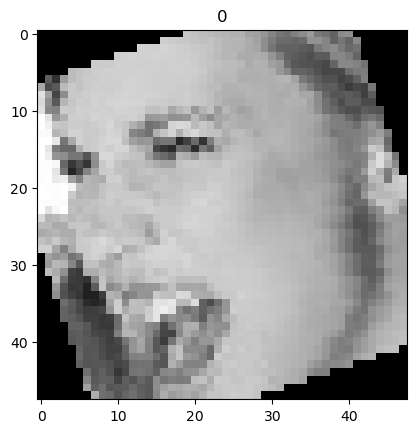

In [74]:
image, label = trainset[14]
plt.imshow(image.permute(1,2,0)) #(image comes up with height, width and channel)
plt.title(label);

Here, we see a '0' in the title of the image, which represents the facial expression of the expression depicted in the image.

## Load Dataset into Batches

In [75]:
from torch.utils.data import DataLoader

In [76]:
trainloader = DataLoader(trainset, batch_size = BATCH_SIZE, shuffle=True)
validloader = DataLoader(validset, batch_size = BATCH_SIZE)

In [77]:
print(f"Total number of batches in trainloader : {len(trainloader)}")
print(f"Total number of batches in validloader : {len(validloader)}")

Total number of batches in trainloader : 901
Total number of batches in validloader : 221


In [78]:
for images, labels in trainloader:
    break;

print(f"One image batch shape {images.shape}")
print(f"One image batch shape {labels.shape}")

One image batch shape torch.Size([32, 3, 48, 48])
One image batch shape torch.Size([32])


Here, We can see One image batch shape is 32, 3, 48, 48 which means 32 is the number of images according to the batch size which has been declared before along with "BATCH_SIZE, EPOCS......", 3 is the number of channel and 48, 48 is the height and width 

# Create Model

In [79]:
import timm
from torch import nn

In [80]:
class FaceModel(nn.Module):
    def __init__(self):
        super(FaceModel, self).__init__()
        self.eff_net = timm.create_model('efficientnet_b0', pretrained = True, num_classes = 7)
    
    def forward(self, images, labels = None):
        logits = self.eff_net(images)
        
        if labels != None:
            loss = nn.CrossEntropyLoss()(logts, labels)
            return logits, loss
        return logits

In [81]:
model = FaceModel()
model.to(DEVICE)

FaceModel(
  (eff_net): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, kernel_size=(1, 

# Create Train and Evaluate Function

In [82]:
from tqdm import tqdm

In [83]:
def mutliclass_accuracy(y_pred, y_true):
    top_p, top_class = y_pred.t0pk(1, dim = 1)
    equals = top_class == y_true.view(*top_class.shape)
    return torch.mean(equals.type(torch.FloatTensor))

In [114]:
def train_fn(model, dataloader, optimizer, current_epo):
    
    model.train()
    total_loss = 0.0
    total_acc = 0.0
    tk = tqdm(dataloader, desc= "EPOCH" + "[TRAIN]" + str(current_epo + 1)+ "/" + str(EPOCHS))
    
    for t, data in enumerate(tk):
        images, labels = data
        image, labels = images.to(DEVICE), labels.to(DEVICE)
        
        optimizer.zero_grad()
        logits, loss = model(images, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_acc += multiclass_accuracy(logits, labels)
        tk.set_postfix({'loss' : "%6f" %float(total_loss / (t+1)), 'acc' : "%6f" %float(total_acc / (t+1)),})
        
    return total_loss / len(dataloader), total_acc / len(dataloader)


In [115]:
def eval_fn(model, dataloader, current_epo):
    
    model.eval()
    total_loss = 0.0
    total_acc = 0.0
    tk = tqdm(dataloader, desc= "EPOCH" + "[VALID]" + str(current_epo + 1)+ "/" + str(EPOCHS))
    
    for t, data in enumerate(tk):
        images, labels = data
        image, labels = images.to(DEVICE), labels.to(DEVICE)
        
        logits, loss = model(images, labels)
        
        total_loss += loss.item()
        total_acc += multiclass_accuracy(logits, labels)
        tk.set_postfix({'loss' : "%6f" %float(total_loss / (t+1)), 'acc' : "%6f" %float(total_acc / (t+1)),})
        
    return total_loss / len(dataloader), total_acc / len(dataloader)

# Create Training Loop

In [116]:
optimizer = torch.optim.Adam(model.parameters(), lr = LR)

In [119]:
best_valid_loss = np.Inf

for i in range(EPOCHS):
    train_loss, train_acc = train_fn(model, trainloader, optimizer, i) # "i" is the current epoch
    valid_loss, valid_acc = eval_fn(model, validloader, i)
    
    if valid_loss < best_valid_loss:
        torch.save(model.state_dict(), "best-weights.pt")
        print("SAVED-BEST-WEIGHTS")

EPOCH[TRAIN]1/15:   0%|                                 | 0/901 [00:00<?, ?it/s]


NameError: name 'logts' is not defined